In [1]:
from lib.PerformanceEvaluator import get_data_set, case_list, get_event_in_range
import numpy as np

# Load data

In [2]:
#load data
train_bias, val_bias, tra_gpos, val_gpos, tra_truth, val_truth = get_data_set(case_list[3],\
                                                                              normalization = True,\
                                                                              flatten = True)
#get the evetnt within the lim (events at center)
center_val_bias, center_val_gpos, center_val_truth = get_event_in_range(val_bias, val_gpos, val_truth, lim = 10)


# Load ML model

In [3]:
import tensorflow.keras as keras
from lib.RPD_CM_calculator import RPD_CM_calculator

In [4]:
#load model and make a predcition
model = keras.models.load_model(f"./Output/Model/Energy_reso_binaryX_{case_list[3]}_19.h5")
val_predict = model.predict(center_val_bias)

In [5]:
#calculate the CoM from ML output (Recon_CM)

Recon_CM = RPD_CM_calculator(val_predict.reshape(-1,4,4), correction = False)
Recon_CM.X_pos_array = np.array([-15, -5, 5, 15])
Recon_CM.Y_pos_array = np.array([15, 5, -5, -15])
Recon_CM.calculate_CM()    
Recon_CM_result = Recon_CM.CM

Calculate center of mass
Done
The result is in self.CM


# CoM

In [6]:
from lib.RPD_CM_calculator import RPD_CM_calculator

In [7]:
True_CM = RPD_CM_calculator(center_val_truth.reshape(-1,4,4) , correction = False)
#set up the position of each channel in x/y
True_CM.X_pos_array = np.array([-15, -5, 5, 15])
True_CM.Y_pos_array = np.array([15, 5, -5, -15])
True_CM.calculate_CM()
True_CM_result = True_CM.CM

Calculate center of mass
Done
The result is in self.CM


# Plot 2D result

In [8]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Normalized number of events')

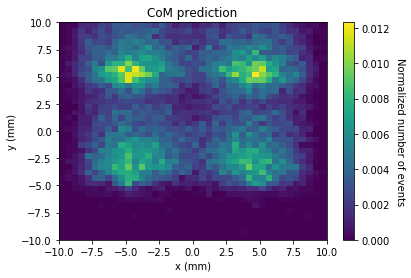

In [9]:
#plot 2d histogram for prediction 
hist_range = [-10, 10]
hist_range2D = [hist_range, hist_range]
plt.hist2d(Recon_CM_result[:,0], Recon_CM_result[:,1], bins = 40, normed=True, range = hist_range2D)
plt.xlim(hist_range)
plt.ylim(hist_range)
plt.title("CoM prediction")
plt.xlabel("x (mm)")
plt.ylabel("y (mm)")
cbar = plt.colorbar()
cbar.ax.get_yaxis().labelpad = 15
cbar.ax.set_ylabel('Normalized number of events', rotation=270)


Text(0, 0.5, 'Normalized number of events')

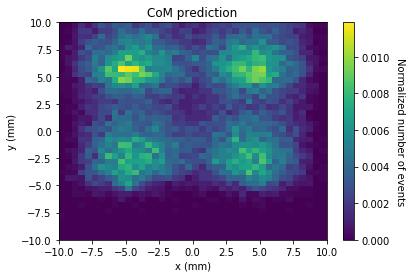

In [10]:
#plot 2d histogram for truth
hist_range = [-10, 10]
hist_range2D = [hist_range, hist_range]
plt.hist2d(True_CM_result[:,0], True_CM_result[:,1], bins = 40, normed=True, range = hist_range2D)
plt.xlim(hist_range)
plt.ylim(hist_range)
plt.title("CoM prediction")
plt.xlabel("x (mm)")
plt.ylabel("y (mm)")
cbar = plt.colorbar()
cbar.ax.get_yaxis().labelpad = 15
cbar.ax.set_ylabel('Normalized number of events', rotation=270)


# Plot residual result

In [11]:
from lib.Visualization import plot_residual
from lib.Fitting import fit_gaussian, fit_double_gaussian

In [12]:
single_gaussian_plt_para = {'fit_function':fit_gaussian,
    "init_para" :(10,1, 1),#init fit constant for the gaussian
    "n_bins": 200,#number of bin for the historgram in fit_range_def
    "fit_range_def": (-10, 10),#the range for gaussian fitting
    "range_def": (-10, 10),#the whole range of the histogram 
    "xlim": [-3, 3],#the range of the plot in x
    "density": True,#normalize histogram to density
    "output_path":""}#output path for figure

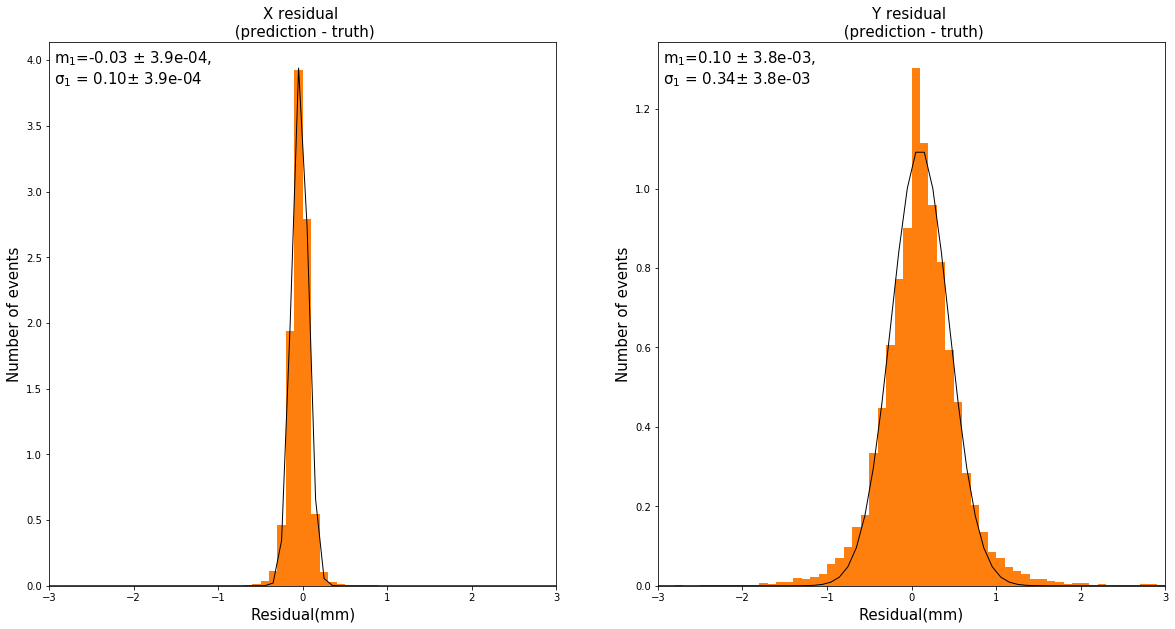

In [13]:
CM_residual = True_CM_result - Recon_CM_result

ax, fig = plot_residual(CM_residual, **single_gaussian_plt_para)   
